# **Mental Health & Depression Analysis**

This project aims to explore and analyze mental health and depression-related data using machine learning and statistical techniques. The goal is to uncover patterns, correlations, and potential predictive features that can contribute to better understanding and early identification of mental health issues.

# Using Kaggle Dataset (In this notebook)

This dataset comprises mental health data from 1977 Bangladeshi university students across 15 top universities, collected from November to December 2023 using Google Forms. It includes assessments of academic anxiety, stress, and depression using widely used psychometric scales. The structured questionnaire covers sociodemographic variables and their associations, facilitating comprehensive analysis. 

🔗 [Kaggle](https://www.kaggle.com/datasets/mohsenzergani/bangladeshi-university-students-mental-health)

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

**Dataset Loading**

In [2]:
# Load the dataset
data = pd.read_csv('../Data/Raw_Data.csv')


**Data Pre-processing and Processing**

In [3]:
data.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [4]:
data.shape

(1977, 39)

In [5]:
data.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

**Renaming Columns for better referencing via mapping**

It allows easier manipulation of the dataset and enhances readability. It makes the dataset seem more user-friendly.

In [6]:
column_mapping = {
    "1. Age":"Age",
    "2. Gender":"Gender",
    "3. University":"University",
    "4. Department":"Dept",
    "5. Academic Year":"AY",
    "6. Current CGPA":"Current CGPA",
    '7. Did you receive a waiver or scholarship at your university?': 'Waiver/Scholarship',
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Nervous/Anxious',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Worrying',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Trouble Relaxing ',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Easily Annoyed',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Excessive Worry ',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Restless',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Fearful ',
    'Anxiety Value': 'Anxiety Value',
    'Anxiety Label': 'Anxiety Label',
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'Upset',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'Lack of Control',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'Nervous/Stress ',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'Inadequate Coping',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'Confident',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'Things Going Well',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'Control Irritations',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'Top Performance',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'Angered by Performance',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'Overwhelmed',
    'Stress Value': 'Stress Value',
    'Stress Label': 'Stress Label',
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 'Lack of Interest',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 'Feeling Down',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 'Sleep Issues',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 'Fatigue',
    '5. In a semester, how often have you had poor appetite or overeating? ': 'Appetite Issues',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 'Self-Doubt',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 'Concentration Issues',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 'Movement Issues',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 'Suicidal Thoughts',
    "Depression Value":"Depression Value",
    "Depression Label":"Depression Label"
}

In [7]:
data.rename(columns=column_mapping, inplace=True)

In [8]:
data.columns

Index(['Age', 'Gender', 'University', 'Dept', 'AY', 'Current CGPA',
       'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Anxiety Label', 'Upset',
       'Lack of Control', 'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value', 'Stress Label',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value',
       'Depression Label'],
      dtype='object')

**After Mapping**

In [9]:
data.head()

,Age,Gender,University,Dept,AY,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


# Individual Column Analysis

In [10]:
for i in data.columns:
    print(i,"\n")
    print(f"Unique Values =  \n {data[i].unique()} \n ", "\n")
    print(f"Unique Value Count=  \n {data[i].value_counts()} \n ", "-"*100 , "\n")

Age 

Unique Values =  
 ['18-22' '23-26' 'Below 18' '27-30' 'Above 30'] 
  

Unique Value Count=  
 Age
18-22       1273
23-26        673
27-30         24
Below 18       4
Above 30       3
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

Gender 

Unique Values =  
 ['Female' 'Male' 'Prefer not to say'] 
  

Unique Value Count=  
 Gender
Male                 1372
Female                595
Prefer not to say      10
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

University 

Unique Values =  
 ['Independent University, Bangladesh (IUB)' 'Daffodil University'
 'Bangladesh University of Engineering and Technology (BUET)'
 'BRAC University' 'Dhaka University (DU)' 'North South University (NSU)'
 'American International University Bangladesh (AIUB)'
 'Dhaka University of Engineering and Technology (DUET)'
 'Rajshahi University

# Removal of some data due to limitations 
Certain records are being removed due to limited representation or relevance:
<ul>
    <li>Age: Excluding records for 'Below 18' and 'Above 30' due to minimal entries.</li>
    <li>Gender: Removing records where participants chose 'Prefer not to say' for insufficient gender insights.</li>
    <li>Department: Dropping entries from departments with very few records, such as 'Engineering - Other', 'Pharmacy and Public Health', 'Law and Human Rights', and 'Liberal Arts and Social Sciences'.</li>
</ul>

In [11]:
conditions_to_drop = (
    (data['Age'] == 'Below 18') |
    (data['Age'] == 'Above 30') |
    (data['Gender'] == 'Prefer not to say') |
    (data['Dept'] == 'Engineering - Other') |
    (data['Dept'] == 'Pharmacy and Public Health') |
    (data['Dept'] == 'Law and Human Rights') |
    (data['Dept'] == 'Liberal Arts and Social Sciences')
)

print(f"Total number of records: {len(data)}")
print(f"Number of records to be dropped: {len(data[conditions_to_drop])}")
print(f"Percentage of data being deleted: { (len(data[conditions_to_drop]) / len(data)) * 100:.2f}%")

df = data[~conditions_to_drop]

Total number of records: 1977
Number of records to be dropped: 24
Percentage of data being deleted: 1.21%


In [12]:
df.shape

(1953, 39)

**Mapping Departments names to short names**

Reason for Mapping: Simplifies data by standardizing department names and converting range-based columns to midpoints. This enhances consistency and enables more straightforward analysis.

In [13]:
print(df['Dept'].unique())
print(df['AY'].unique())


['Engineering - CS / CSE / CSC / Similar to CS' 'Other'
 'Engineering - EEE/ ECE / Similar to EEE'
 'Environmental and Life Sciences' 'Business and Entrepreneurship Studies'
 'Biological Sciences' 'Engineering - Civil Engineering / Similar to CE'
 'Engineering - Mechanical Engineering / Similar to ME']
['Fourth Year or Equivalent' 'First Year or Equivalent'
 'Third Year or Equivalent' 'Second Year or Equivalent' 'Other']


In [14]:
df = df.copy() 

In [15]:
Academic_year_mapping ={
    'Fourth Year or Equivalent': 4,
    'First Year or Equivalent': 1,
    'Third Year or Equivalent': 3,
    'Second Year or Equivalent': 2,
    'Other': -1            #placeholder for others  
}
df['AY'] = df['AY'].map(Academic_year_mapping)
df.head()

,Age,Gender,University,Dept,AY,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,4,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [16]:
df.head()

,Age,Gender,University,Dept,AY,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,4,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [17]:
for i in data.columns:
    print(i,"\n")
    print(f"Unique Values =  \n {data[i].unique()} \n ", "\n")
    print(f"Unique Value Count=  \n {data[i].value_counts()} \n ", "-"*100 , "\n")

Age 

Unique Values =  
 ['18-22' '23-26' 'Below 18' '27-30' 'Above 30'] 
  

Unique Value Count=  
 Age
18-22       1273
23-26        673
27-30         24
Below 18       4
Above 30       3
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

Gender 

Unique Values =  
 ['Female' 'Male' 'Prefer not to say'] 
  

Unique Value Count=  
 Gender
Male                 1372
Female                595
Prefer not to say      10
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

University 

Unique Values =  
 ['Independent University, Bangladesh (IUB)' 'Daffodil University'
 'Bangladesh University of Engineering and Technology (BUET)'
 'BRAC University' 'Dhaka University (DU)' 'North South University (NSU)'
 'American International University Bangladesh (AIUB)'
 'Dhaka University of Engineering and Technology (DUET)'
 'Rajshahi University

In [18]:
df.dtypes

Age                       object
Gender                    object
University                object
Dept                      object
AY                         int64
Current CGPA              object
Waiver/Scholarship        object
Nervous/Anxious            int64
Worrying                   int64
Trouble Relaxing           int64
Easily Annoyed             int64
Excessive Worry            int64
Restless                   int64
Fearful                    int64
Anxiety Value              int64
Anxiety Label             object
Upset                      int64
Lack of Control            int64
Nervous/Stress             int64
Inadequate Coping          int64
Confident                  int64
Things Going Well          int64
Control Irritations        int64
Top Performance            int64
Angered by Performance     int64
Overwhelmed                int64
Stress Value               int64
Stress Label              object
Lack of Interest           int64
Feeling Down               int64
Sleep Issu

# Preprocessing

In [19]:
df.duplicated().sum()

np.int64(3)

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(1950, 39)

In [22]:
df.isnull().sum()

Age                       0
Gender                    0
University                0
Dept                      0
AY                        0
Current CGPA              0
Waiver/Scholarship        0
Nervous/Anxious           0
Worrying                  0
Trouble Relaxing          0
Easily Annoyed            0
Excessive Worry           0
Restless                  0
Fearful                   0
Anxiety Value             0
Anxiety Label             0
Upset                     0
Lack of Control           0
Nervous/Stress            0
Inadequate Coping         0
Confident                 0
Things Going Well         0
Control Irritations       0
Top Performance           0
Angered by Performance    0
Overwhelmed               0
Stress Value              0
Stress Label              0
Lack of Interest          0
Feeling Down              0
Sleep Issues              0
Fatigue                   0
Appetite Issues           0
Self-Doubt                0
Concentration Issues      0
Movement Issues     

In [23]:
df.head()

,Age,Gender,University,Dept,AY,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,4,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,1,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


# Statistics after preprocessing

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AY,1950.0,2.273846,1.275286,-1.0,1.00,2.0,3.0,4.0
Nervous/Anxious,1950.0,1.770769,0.950961,0.0,1.00,2.0,3.0,3.0
Worrying,1950.0,1.632308,1.027424,0.0,1.00,2.0,3.0,3.0
Trouble Relaxing,1950.0,1.749231,0.996241,0.0,1.00,2.0,3.0,3.0
Easily Annoyed,1950.0,1.782051,0.963780,0.0,1.00,2.0,3.0,3.0
Excessive Worry,1950.0,1.860513,0.981109,0.0,1.00,2.0,3.0,3.0
Restless,1950.0,1.788205,0.991376,0.0,1.00,2.0,3.0,3.0
Fearful,1950.0,1.720000,1.057389,0.0,1.00,2.0,3.0,3.0
Anxiety Value,1950.0,12.303077,5.483773,0.0,8.00,13.0,17.0,21.0
Upset,1950.0,2.340513,1.176541,0.0,2.00,2.0,3.0,4.0


In [25]:
# Checking for numerical and categorical columns
numerica_columns = df.select_dtypes(exclude="object").columns
categorical_columns = df.select_dtypes(include="object").columns

print(df.shape, "\n")

print(f"Total Numerical Columns:  {len(numerica_columns)}  \n {numerica_columns} \n", "-" * 80 ,"\n")
print(f"Total Categorical Columns {len(categorical_columns)}  \n {categorical_columns} \n")

(1950, 39) 

Total Numerical Columns:  30  
 Index(['AY', 'Nervous/Anxious', 'Worrying', 'Trouble Relaxing ',
       'Easily Annoyed', 'Excessive Worry ', 'Restless', 'Fearful ',
       'Anxiety Value', 'Upset', 'Lack of Control', 'Nervous/Stress ',
       'Inadequate Coping', 'Confident', 'Things Going Well',
       'Control Irritations', 'Top Performance', 'Angered by Performance',
       'Overwhelmed', 'Stress Value', 'Lack of Interest', 'Feeling Down',
       'Sleep Issues', 'Fatigue', 'Appetite Issues', 'Self-Doubt',
       'Concentration Issues', 'Movement Issues', 'Suicidal Thoughts',
       'Depression Value'],
      dtype='object') 
 -------------------------------------------------------------------------------- 

Total Categorical Columns 9  
 Index(['Age', 'Gender', 'University', 'Dept', 'Current CGPA',
       'Waiver/Scholarship', 'Anxiety Label', 'Stress Label',
       'Depression Label'],
      dtype='object') 



# Visualizations 

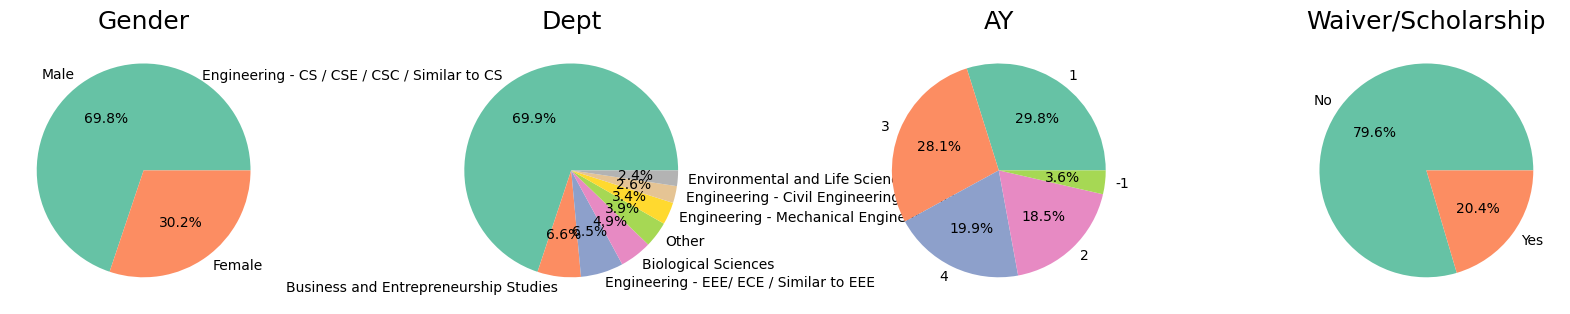

In [26]:
palette = sns.color_palette("Set2")
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
plt.pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Gender",fontsize= 18)

plt.subplot(1,4,2)
plt.pie(df["Dept"].value_counts(), labels=df["Dept"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Dept",fontsize= 18)

plt.subplot(1,4,3)
plt.pie(df["AY"].value_counts(), labels=df["AY"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("AY",fontsize= 18)

plt.subplot(1,4,4)
plt.pie(df["Waiver/Scholarship"].value_counts(), labels=df["Waiver/Scholarship"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Waiver/Scholarship",fontsize= 18)

plt.subplots_adjust(wspace=0.6,hspace=0.5)
plt.show()

C:\Users\revna\AppData\Local\Temp\ipykernel_30584\3474195906.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=df, x="Depression Label", kde=True, palette=palette, hue="Gender")
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\3474195906.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=df, x="Anxiety Label", kde=True, palette=palette, hue="Gender")
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\3474195906.py:38: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=df, x="Stress Label", kde=True, palette=palette, hue="Gender")


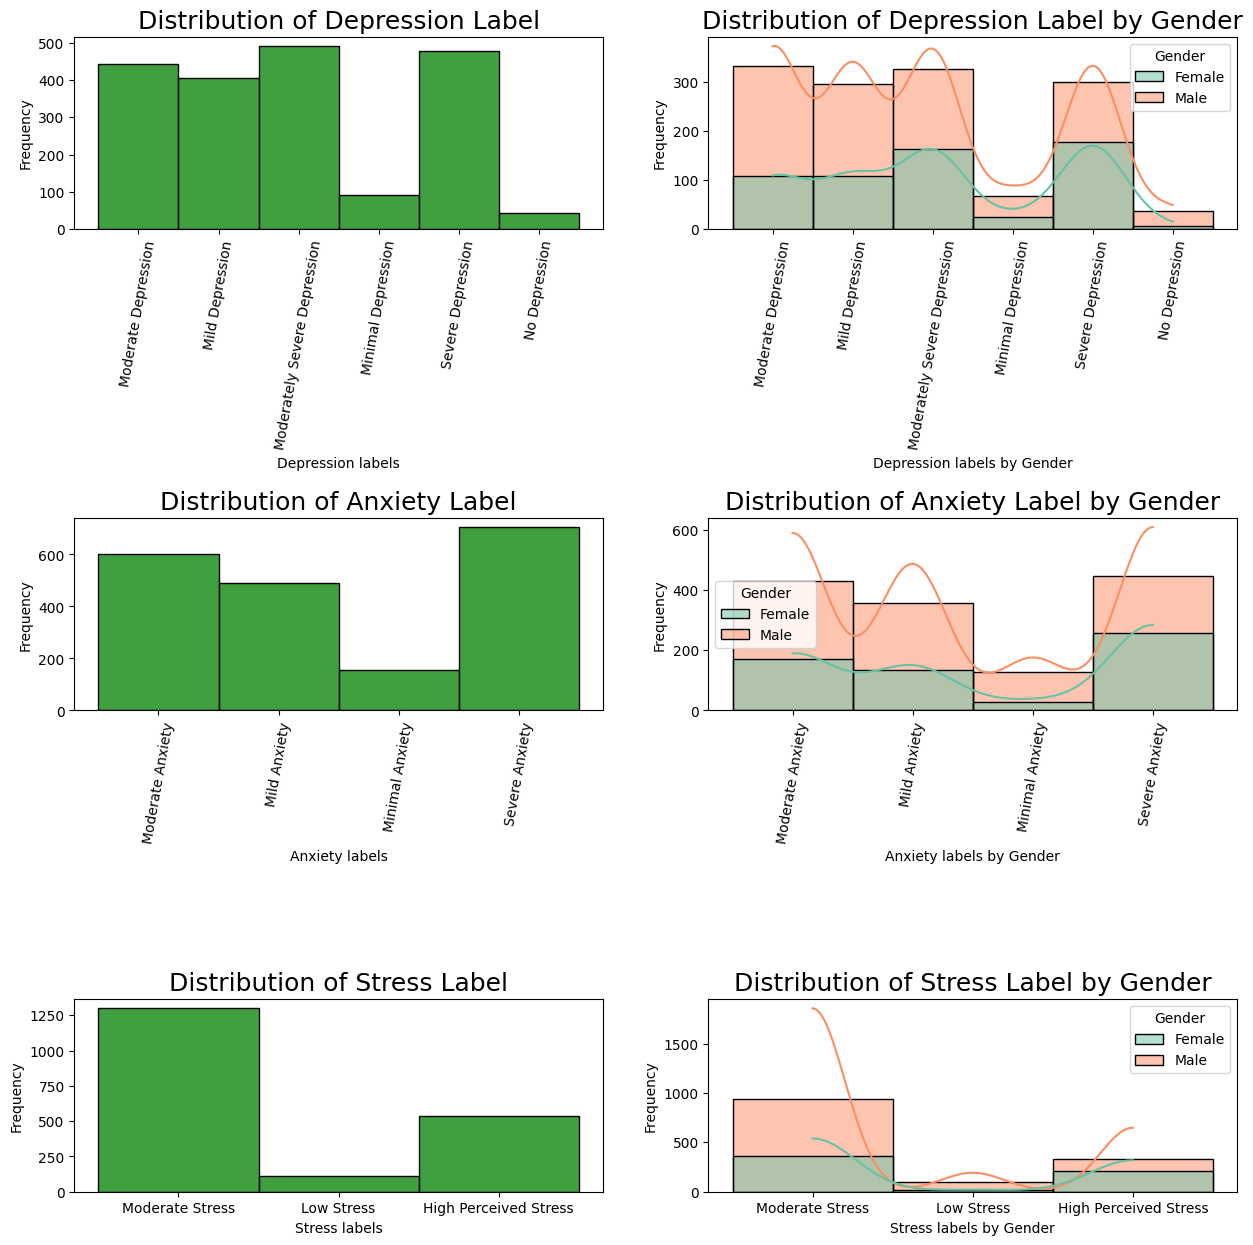

In [27]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.histplot(data=df, x="Depression Label", color="g")
plt.title("Distribution of Depression Label",fontsize= 18)
plt.xlabel("Depression labels")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,2)
sns.histplot(data=df, x="Depression Label", kde=True, palette=palette, hue="Gender")
plt.title("Distribution of Depression Label by Gender",fontsize= 18)
plt.xlabel("Depression labels by Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,3)
sns.histplot(data=df, x="Anxiety Label", color="g")
plt.title("Distribution of Anxiety Label",fontsize= 18)
plt.xlabel("Anxiety labels")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,4)
sns.histplot(data=df, x="Anxiety Label", kde=True, palette=palette, hue="Gender")
plt.title("Distribution of Anxiety Label by Gender",fontsize= 18)
plt.xlabel("Anxiety labels by Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3,2,5)
sns.histplot(data=df, x="Stress Label", color="g")
plt.title("Distribution of Stress Label",fontsize= 18)
plt.xlabel("Stress labels")
plt.ylabel("Frequency")

plt.subplot(3,2,6)
sns.histplot(data=df, x="Stress Label", kde=True, palette=palette, hue="Gender")
plt.title("Distribution of Stress Label by Gender",fontsize= 18)
plt.xlabel("Stress labels by Gender")
plt.ylabel("Frequency")


plt.subplots_adjust(wspace=0.2,hspace=1.5)
plt.show()

C:\Users\revna\AppData\Local\Temp\ipykernel_30584\2366064849.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="Anxiety Label", kde=True, palette=palette)
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\2366064849.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=df, x="Anxiety Label", kde=True, hue="Waiver/Scholarship", palette=palette)
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\2366064849.py:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.histplot(data=df, x="University", kde=True, hue="Anxiety Label", palette=palette)
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\2366064849.py:23: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.histplot(data=(df[df["Waiver/Scholarship"] == "Yes"]), x="University", kde=True, hue="Anxiety Label", palette=

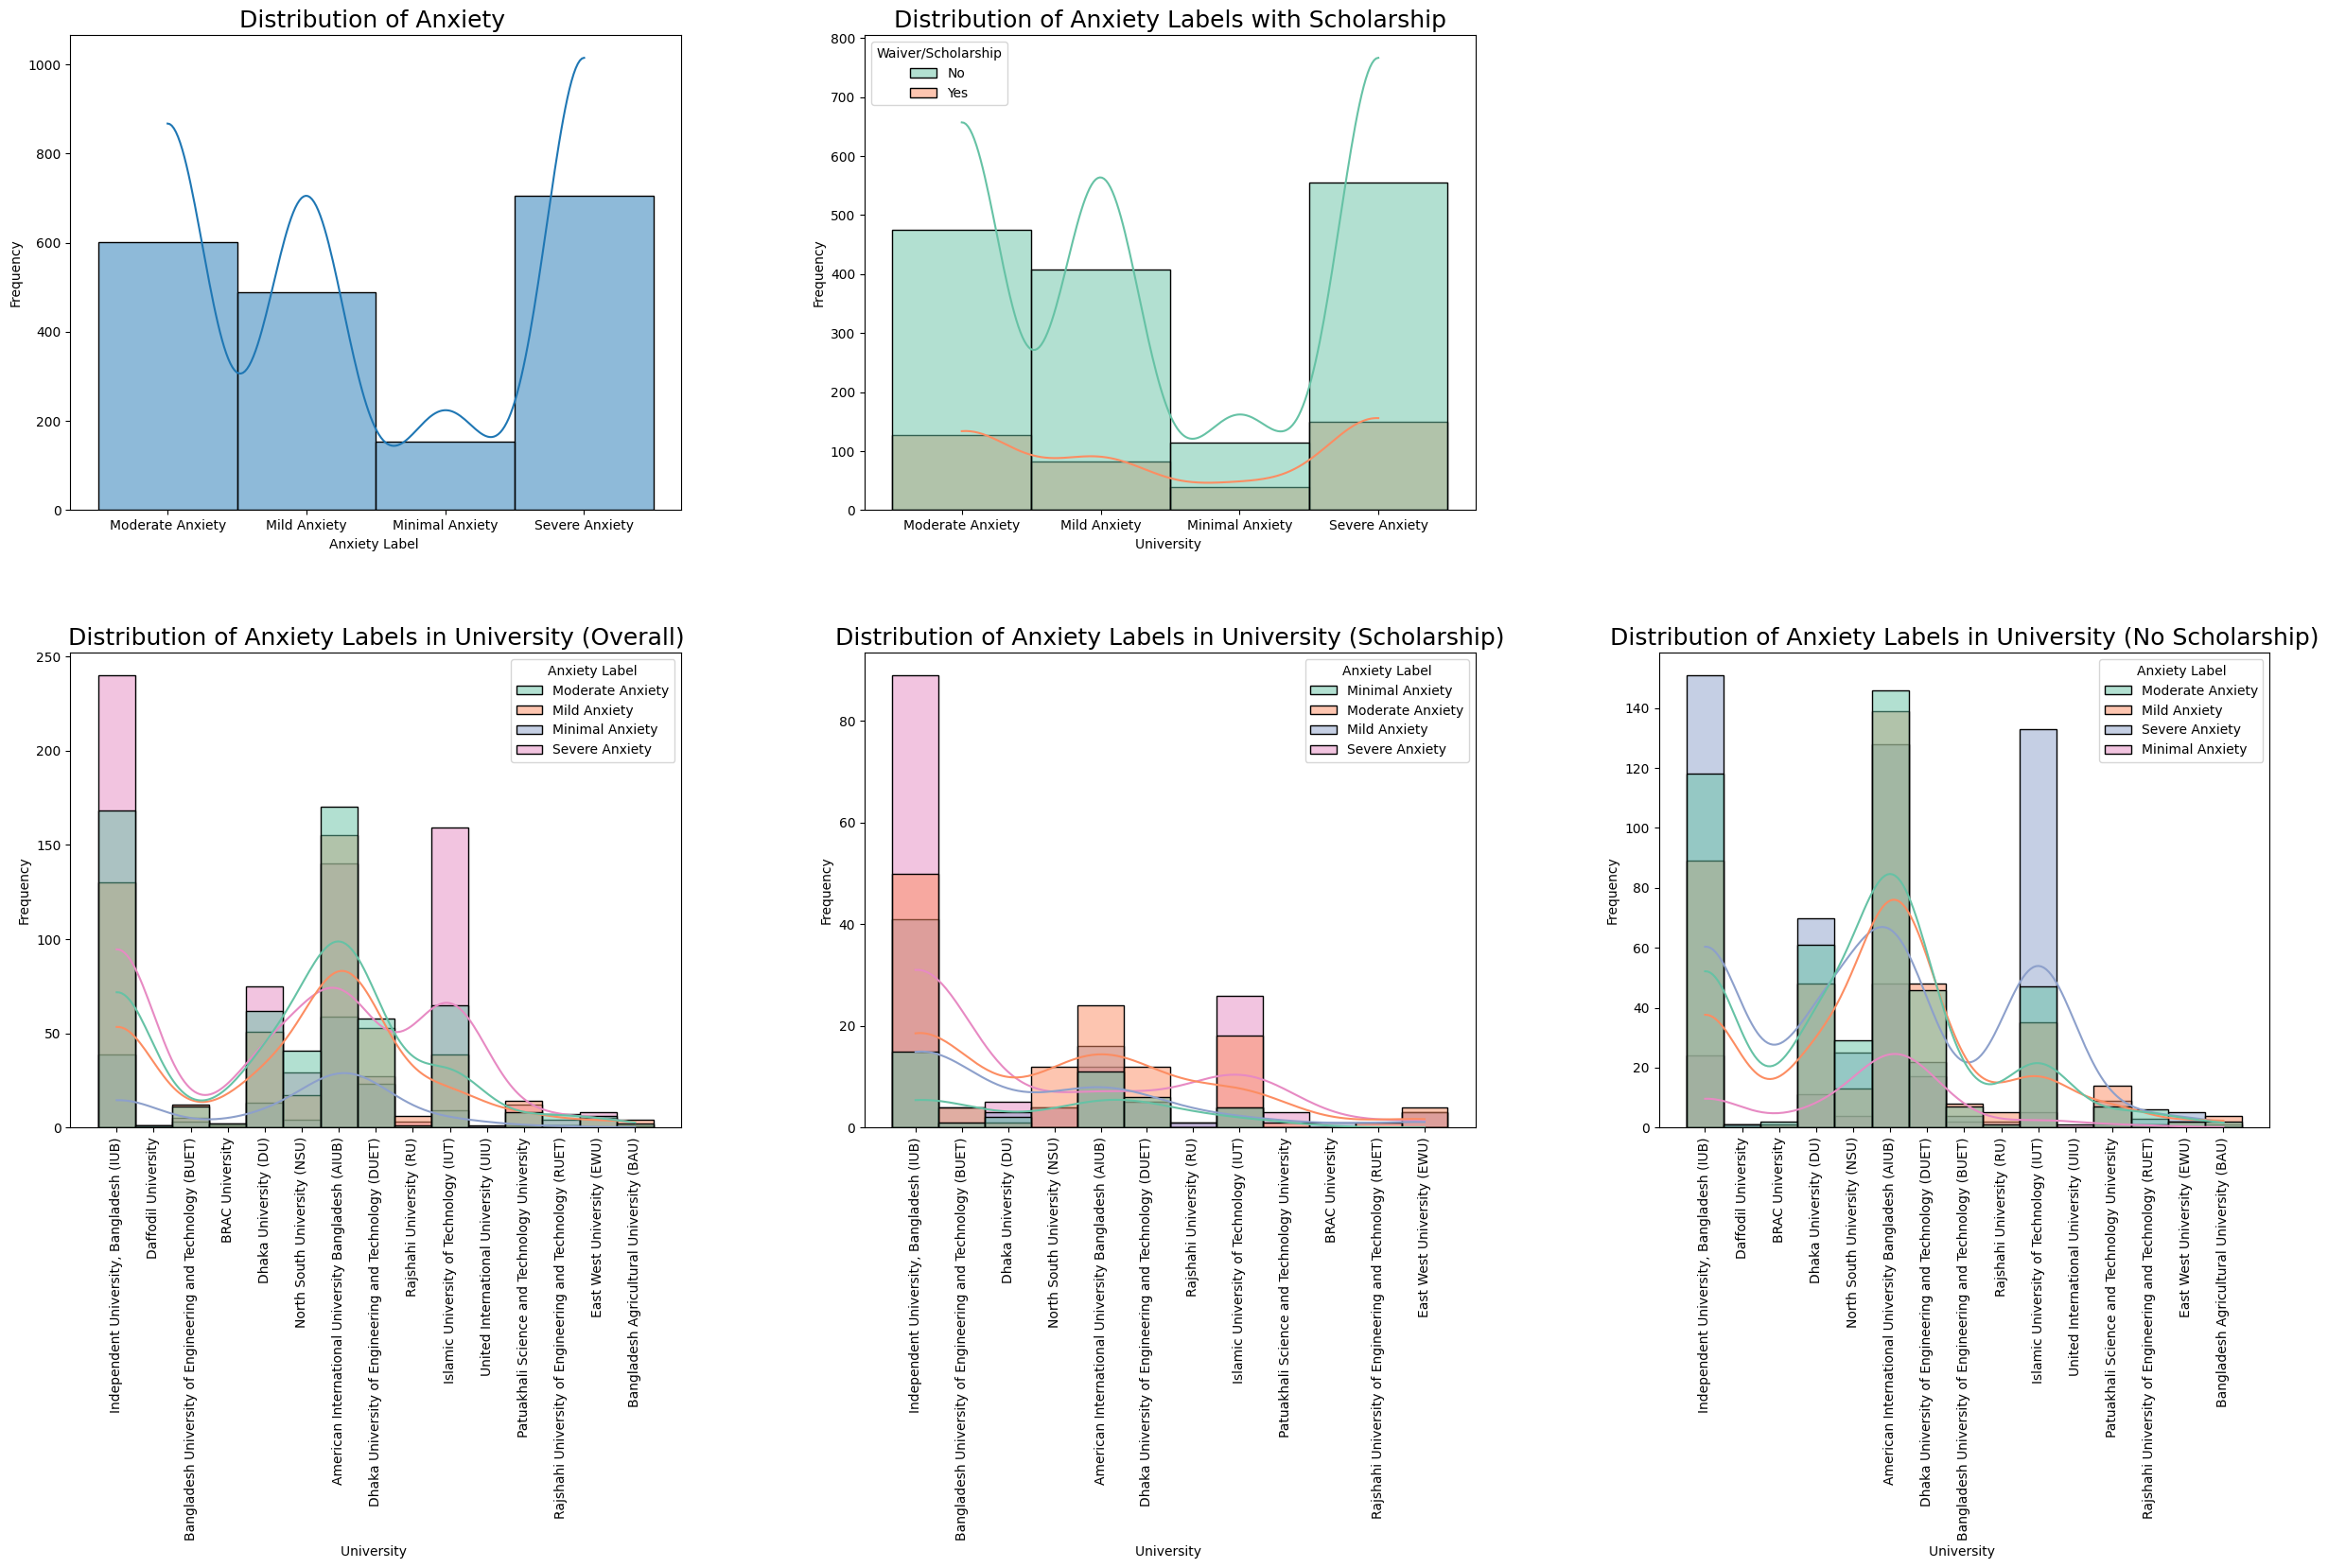

In [28]:
plt.figure(figsize=(30,15))

plt.subplot(2,3,1)
sns.histplot(data=df, x="Anxiety Label", kde=True, palette=palette)
plt.title("Distribution of Anxiety ", fontsize=18)
plt.xlabel("Anxiety Label ")
plt.ylabel("Frequency")

plt.subplot(2,3,2)
sns.histplot(data=df, x="Anxiety Label", kde=True, hue="Waiver/Scholarship", palette=palette)
plt.title("Distribution of Anxiety Labels with Scholarship", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")

plt.subplot(2,3,4)
sns.histplot(data=df, x="University", kde=True, hue="Anxiety Label", palette=palette)
plt.title("Distribution of Anxiety Labels in University (Overall)", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")
plt.xticks(rotation= 90)

plt.subplot(2,3,5)
sns.histplot(data=(df[df["Waiver/Scholarship"] == "Yes"]), x="University", kde=True, hue="Anxiety Label", palette=palette)
plt.title("Distribution of Anxiety Labels in University (Scholarship)", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")
plt.xticks(rotation= 90)

plt.subplot(2,3,6)
sns.histplot(data=(df[df["Waiver/Scholarship"] == "No"]), x="University", kde=True, hue="Anxiety Label", palette=palette)
plt.title("Distribution of Anxiety Labels in University (No Scholarship)", fontsize=18)
plt.xlabel("University ")
plt.ylabel("Frequency")
plt.xticks(rotation= 90)

plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

C:\Users\revna\AppData\Local\Temp\ipykernel_30584\3030129072.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=df, x="Suicidal Thoughts", palette=palette, kde=True, hue="Gender")
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\3030129072.py:34: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="AY", palette=palette)
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\3030129072.py:40: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="AY", palette=palette)
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\3030129072.py:46: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=T

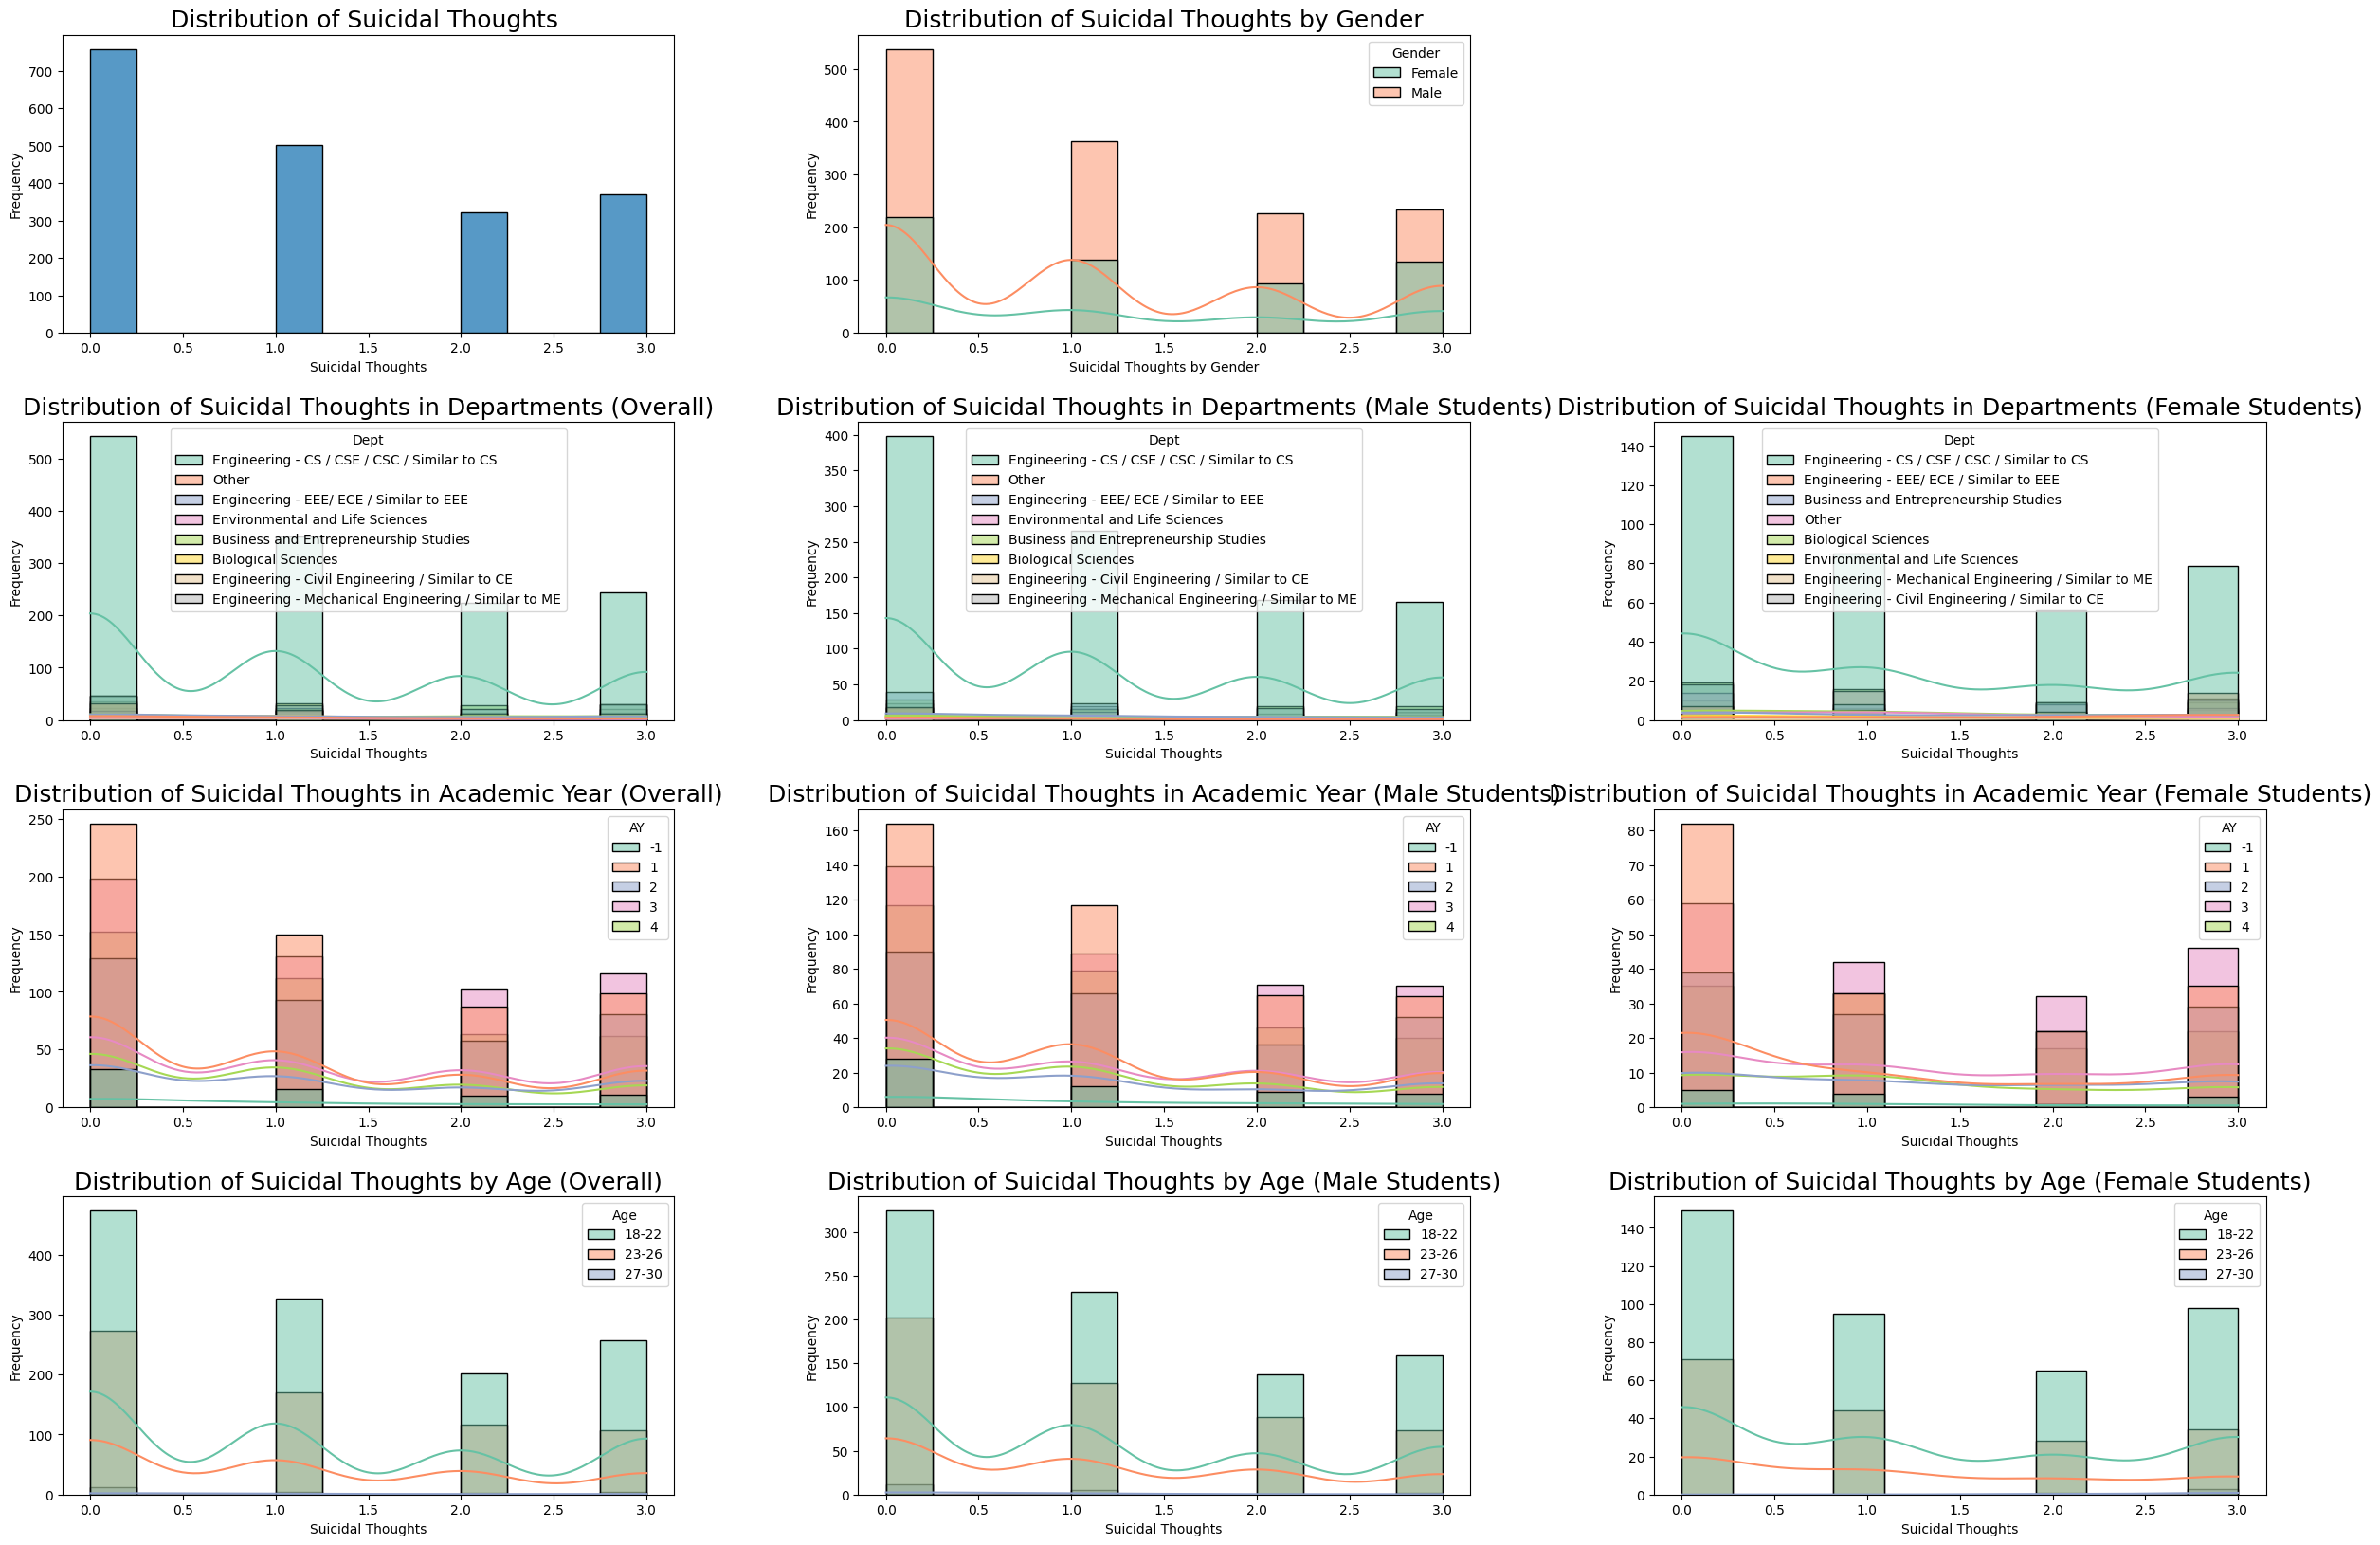

In [29]:
plt.figure(figsize=(30,20))

plt.subplot(4,3,1)
sns.histplot(data=df, x="Suicidal Thoughts")
plt.title("Distribution of Suicidal Thoughts ",fontsize= 18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,2)
sns.histplot(data=df, x="Suicidal Thoughts", palette=palette, kde=True, hue="Gender")
plt.title("Distribution of Suicidal Thoughts by Gender",fontsize= 18)
plt.xlabel("Suicidal Thoughts by Gender")
plt.ylabel("Frequency")

plt.subplot(4,3,4)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Dept", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,5)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Dept", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,6)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Dept", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,7)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="AY", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,8)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="AY", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,9)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="AY", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,10)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,11)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,12)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")


plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

C:\Users\revna\AppData\Local\Temp\ipykernel_30584\148825375.py:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="Age")
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\148825375.py:18: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="AY")
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\148825375.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="Current CGPA")
C:\Users\revna\AppData\Local\Temp\ipykernel_30584\148825375.py:39: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.histplot(data=df, x="Anxiety Label", palette=palette, kde=True, hue="Age")
C:\Users\revna\

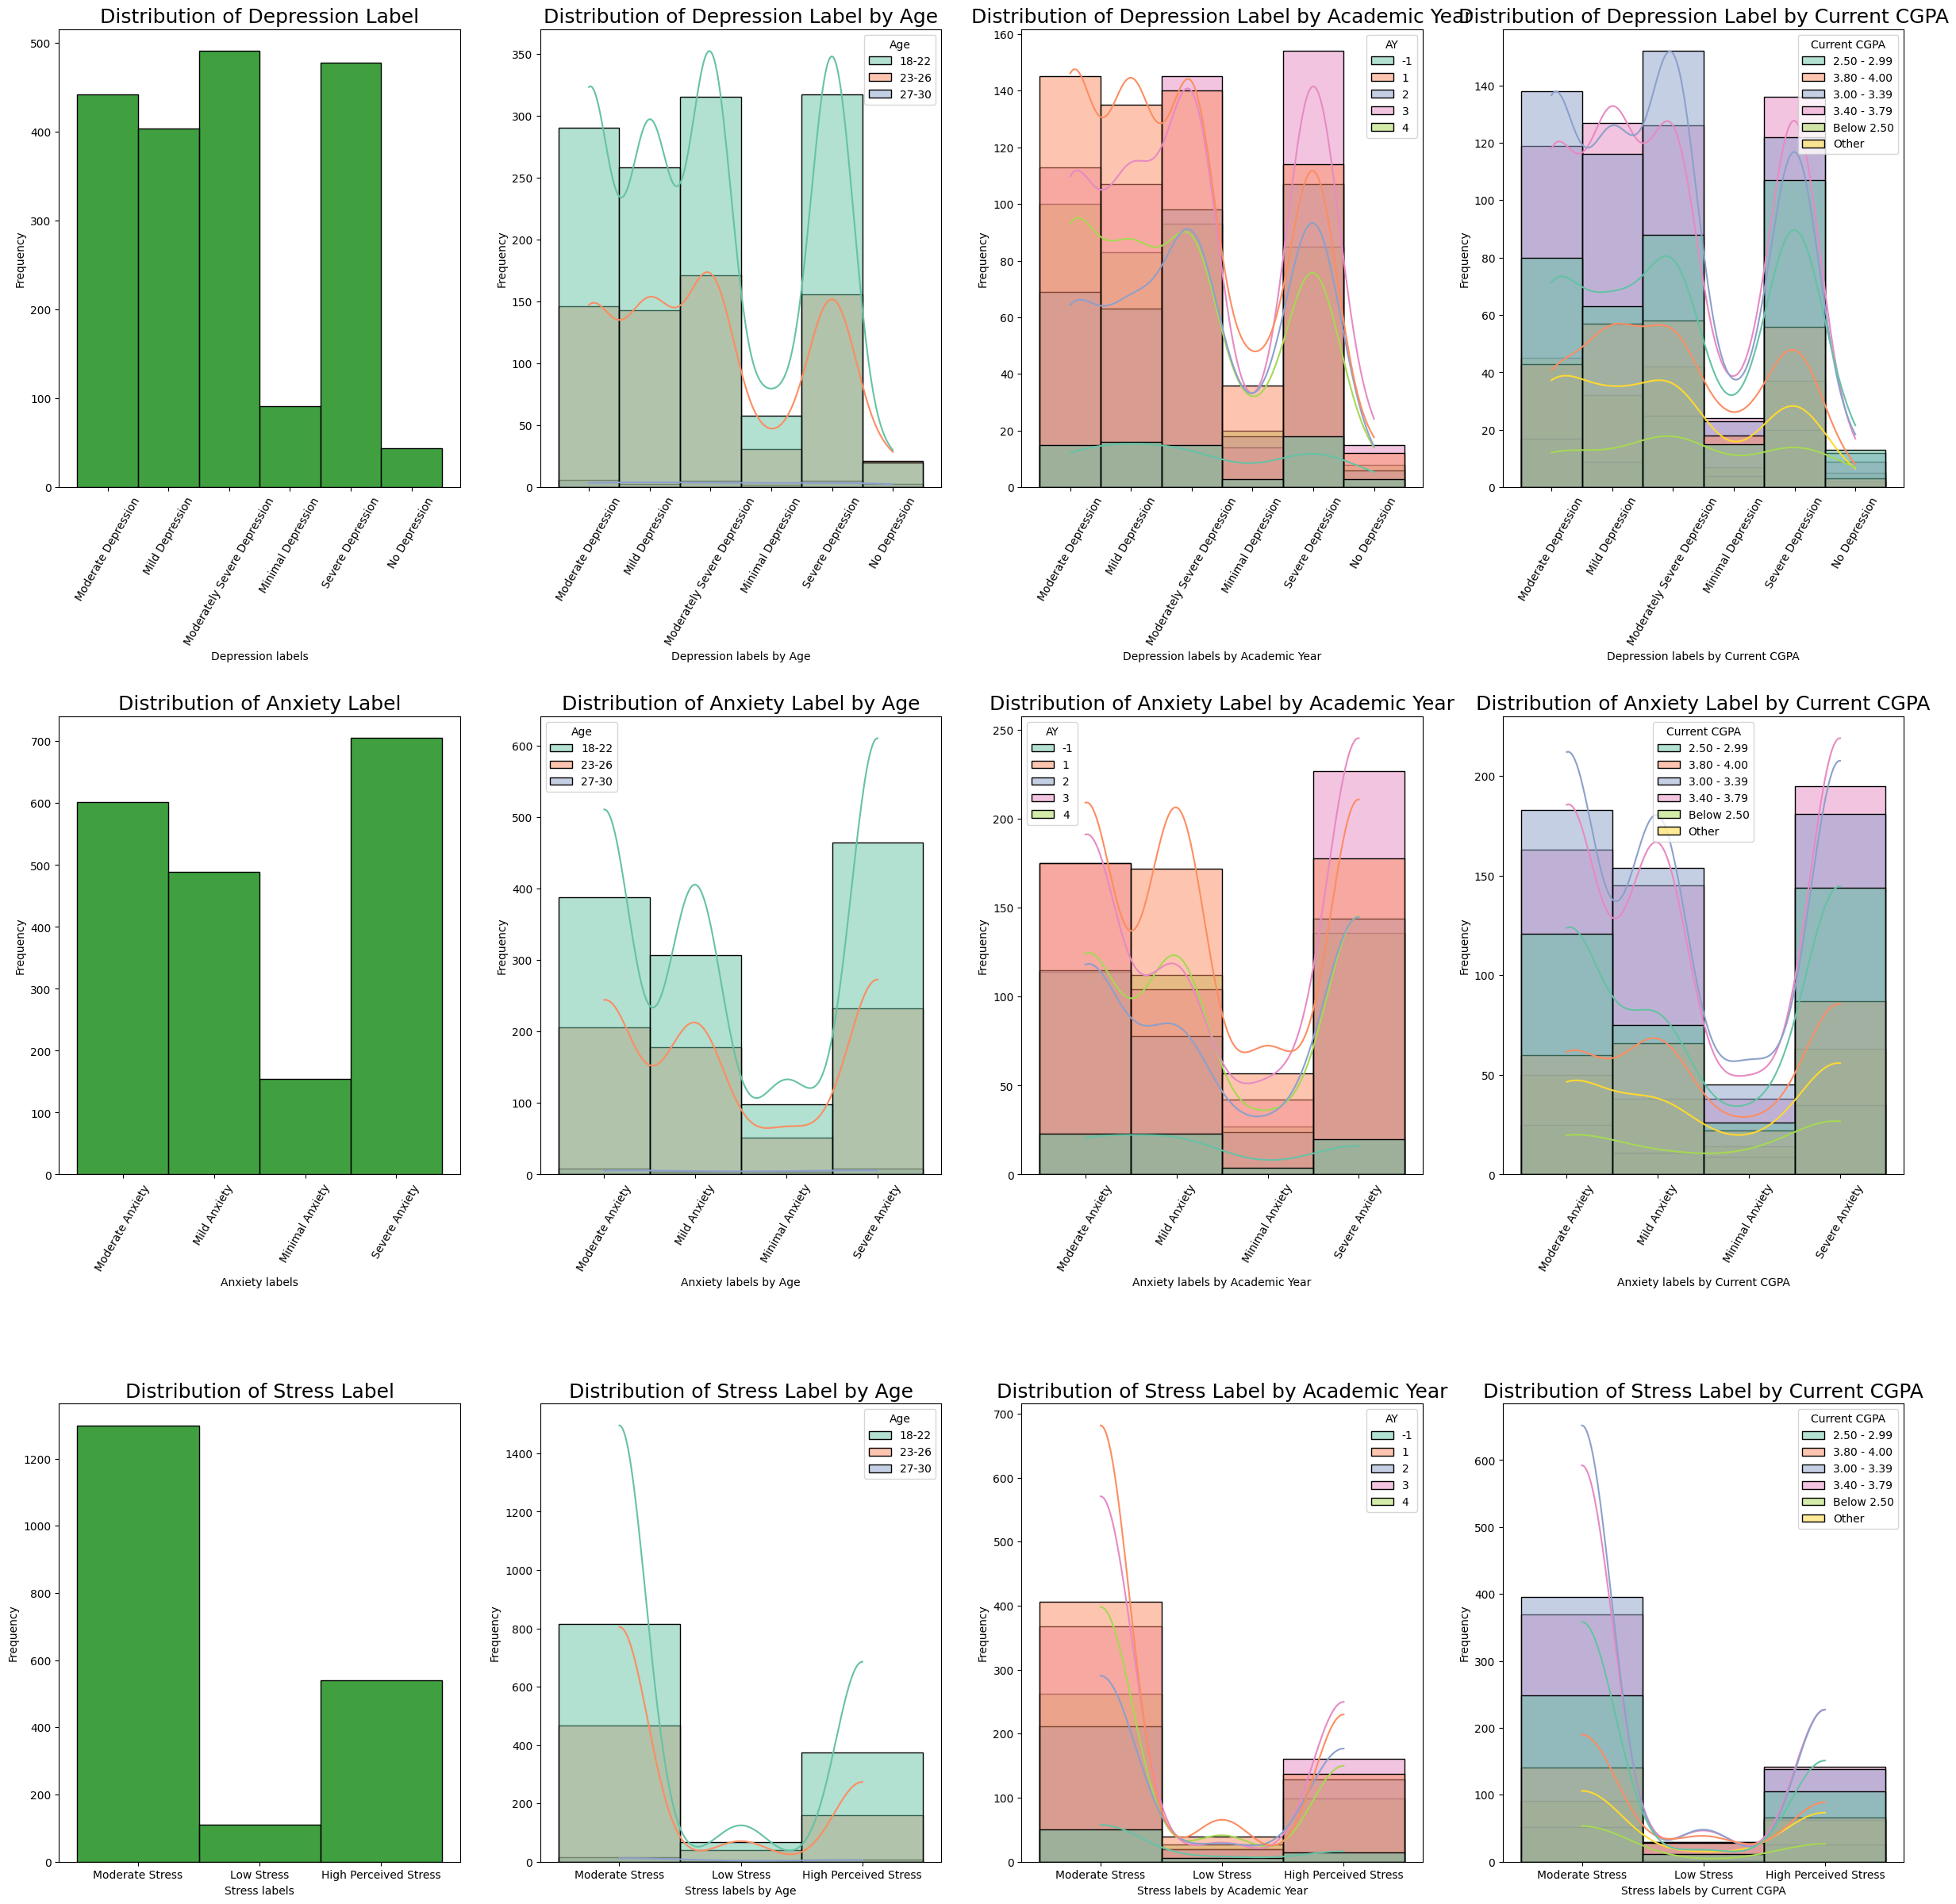

In [30]:
plt.figure(figsize=(30,30))

plt.subplot(3,4,1)
sns.histplot(data=df, x="Depression Label", color="g")
plt.title("Distribution of Depression Label",fontsize= 18)
plt.xlabel("Depression labels")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,2)
sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="Age")
plt.title("Distribution of Depression Label by Age",fontsize= 18)
plt.xlabel("Depression labels by Age")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,3)
sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="AY")
plt.title("Distribution of Depression Label by Academic Year",fontsize= 18)
plt.xlabel("Depression labels by Academic Year")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,4)
sns.histplot(data=df, x="Depression Label", palette=palette, kde=True, hue="Current CGPA")
plt.title("Distribution of Depression Label by Current CGPA",fontsize= 18)
plt.xlabel("Depression labels by Current CGPA")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,5)
sns.histplot(data=df, x="Anxiety Label", color="g")
plt.title("Distribution of Anxiety Label",fontsize= 18)
plt.xlabel("Anxiety labels")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,6)
sns.histplot(data=df, x="Anxiety Label", palette=palette, kde=True, hue="Age")
plt.title("Distribution of Anxiety Label by Age",fontsize= 18)
plt.xlabel("Anxiety labels by Age")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,7)
sns.histplot(data=df, x="Anxiety Label", palette=palette, kde=True, hue="AY")
plt.title("Distribution of Anxiety Label by Academic Year",fontsize= 18)
plt.xlabel("Anxiety labels by Academic Year")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,8)
sns.histplot(data=df, x="Anxiety Label", palette=palette, kde=True, hue="Current CGPA")
plt.title("Distribution of Anxiety Label by Current CGPA",fontsize= 18)
plt.xlabel("Anxiety labels by Current CGPA")
plt.ylabel("Frequency")
plt.xticks(rotation=60)

plt.subplot(3,4,9)
sns.histplot(data=df, x="Stress Label", color="g")
plt.title("Distribution of Stress Label",fontsize= 18)
plt.xlabel("Stress labels")
plt.ylabel("Frequency")

plt.subplot(3,4,10)
sns.histplot(data=df, x="Stress Label", palette=palette, kde=True, hue="Age")
plt.title("Distribution of Stress Label by Age",fontsize= 18)
plt.xlabel("Stress labels by Age")
plt.ylabel("Frequency")

plt.subplot(3,4,11)
sns.histplot(data=df, x="Stress Label", palette=palette, kde=True, hue="AY")
plt.title("Distribution of Stress Label by Academic Year",fontsize= 18)
plt.xlabel("Stress labels by Academic Year")
plt.ylabel("Frequency")

plt.subplot(3,4,12)
sns.histplot(data=df, x="Stress Label", palette=palette, kde=True, hue="Current CGPA")
plt.title("Distribution of Stress Label by Current CGPA",fontsize= 18)
plt.xlabel("Stress labels by Current CGPA")
plt.ylabel("Frequency")

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

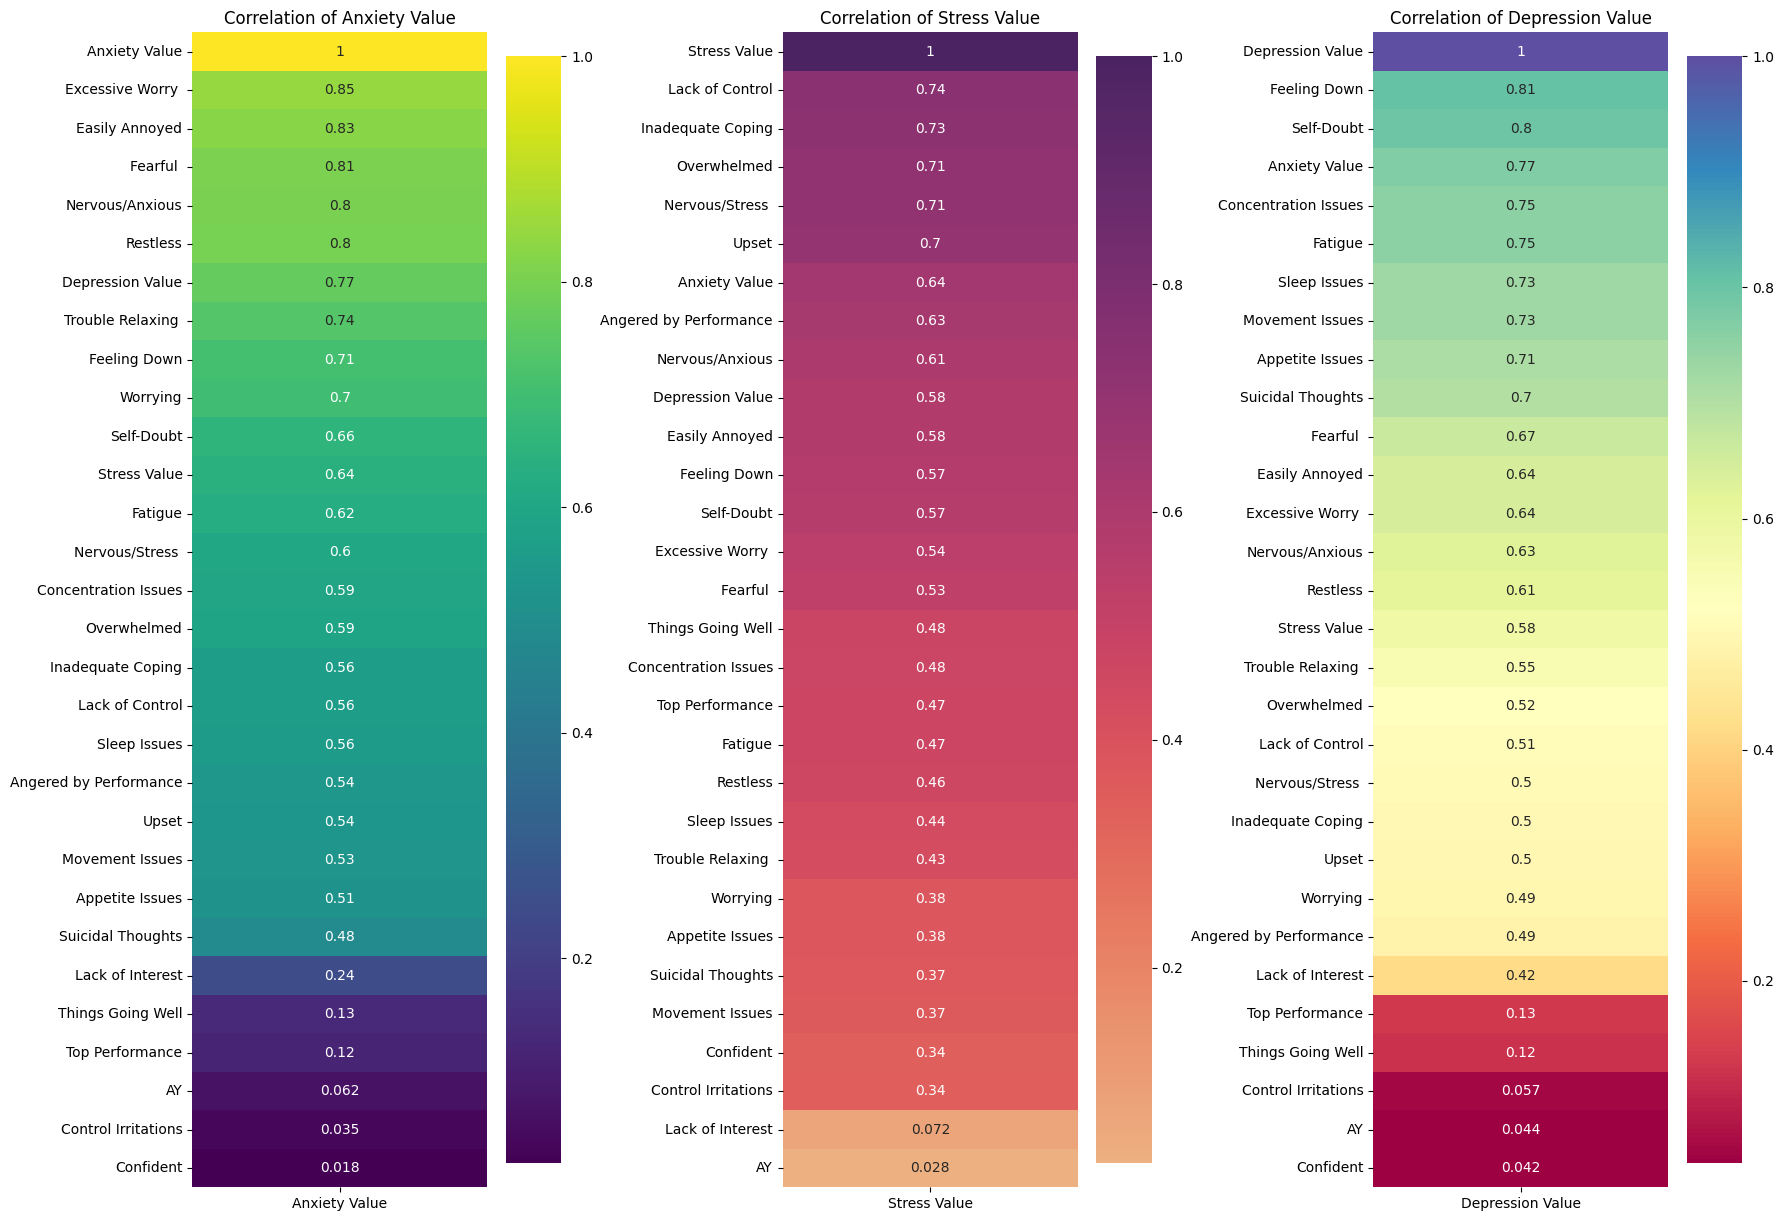

In [31]:
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
sns.heatmap(data=df[numerica_columns].corr()["Anxiety Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="viridis" )
plt.title("Correlation of Anxiety Value")

plt.subplot(1,3,2)
sns.heatmap(data=df[numerica_columns].corr()["Stress Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="flare" )
plt.title("Correlation of Stress Value")

plt.subplot(1,3,3)
sns.heatmap(data=df[numerica_columns].corr()["Depression Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="Spectral" )
plt.title("Correlation of Depression Value")

plt.subplots_adjust(wspace=0.6)
plt.show()

# Encoding

In [32]:
encoder = LabelEncoder()
for i in categorical_columns:
    df[i] = encoder.fit_transform(df[[i]])

c:\Users\revna\Desktop\Projects\Depression_Classification\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\revna\Desktop\Projects\Depression_Classification\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\revna\Desktop\Projects\Depression_Classification\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\revna\Desktop\Projects\Depression_Classification\venv\Lib\site-package

In [33]:
df

,Age,Gender,University,Dept,AY,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,0,0,8,2,4,0,0,1,1,1,...,2,1,1,2,1,1,1,1,11,2
1,0,1,8,2,1,3,0,2,2,1,...,1,1,1,1,1,1,1,1,9,0
2,0,1,8,2,1,1,0,2,1,1,...,0,2,3,2,2,2,2,1,16,3
3,0,1,8,2,1,2,0,2,1,1,...,1,1,1,1,1,1,1,1,9,0
4,0,1,8,2,1,2,0,1,1,1,...,1,1,1,1,1,1,1,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1,1,2,0,4,2,0,1,2,2,...,2,1,2,2,1,1,1,1,13,2
1973,1,0,2,7,4,2,0,2,2,2,...,2,1,2,1,0,1,1,0,9,0
1974,1,0,2,0,-1,3,0,1,0,1,...,3,3,3,3,3,3,1,0,22,5
1975,1,1,2,7,4,1,0,1,1,1,...,1,1,2,2,1,2,2,0,11,2


# Dataset Splitting

In [34]:
x = df.drop(columns=["Anxiety Label","Anxiety Value", "Stress Label", "Stress Value",  "Depression Value", "Depression Label"])
y=df[["Anxiety Label", "Stress Label", "Depression Label"]]

y_anxiety = df["Anxiety Label"]
y_Stress = df["Stress Label"]
y_Depression = df["Depression Label"]

In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [36]:
x

array([[-0.72432544, -1.52194827,  0.64408303, ..., -0.61475056,
        -0.41214819, -0.13609396],
       [-0.72432544,  0.65705256,  0.64408303, ..., -0.61475056,
        -0.41214819, -0.13609396],
       [-0.72432544,  0.65705256,  0.64408303, ...,  0.35827184,
         0.56320251, -0.13609396],
       ...,
       [ 1.24834859, -1.52194827, -0.95586844, ...,  1.33129423,
        -0.41214819, -1.0177658 ],
       [ 1.24834859,  0.65705256, -0.95586844, ...,  0.35827184,
         0.56320251, -1.0177658 ],
       [ 1.24834859,  0.65705256,  0.64408303, ..., -1.58777296,
        -1.3874989 , -1.0177658 ]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_test, y_train_Anxiety, y_test_Anxiety = train_test_split(x, y_anxiety, test_size=0.2, random_state=42)
X_train, X_test, y_train_Stress, y_test_Stress = train_test_split(x, y_Stress, test_size=0.2, random_state=42)
X_train, X_test, y_train_Depression, y_test_Depression = train_test_split(x, y_Depression, test_size=0.2, random_state=42)

The above code splits the dataset into training and testing sets for the overall model, while subsequent lines split the data separately for anxiety, stress, and depression to evaluate each condition individually.

In [38]:
print("Anxiety Train Class Distribution:")
print(y_train_Anxiety.value_counts())

print("\nStress Train Class Distribution:")
print(y_train_Stress.value_counts())

print("\nDepression Train Class Distribution:")
print(y_train_Depression.value_counts())

Anxiety Train Class Distribution:
Anxiety Label
3    573
2    483
0    377
1    127
Name: count, dtype: int64

Stress Train Class Distribution:
Stress Label
2    1032
0     437
1      91
Name: count, dtype: int64

Depression Train Class Distribution:
Depression Label
3    395
5    384
2    351
0    321
1     76
4     33
Name: count, dtype: int64


# Models

In [39]:
# Global list to collect all model results
all_results = []


## SVM

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC

# Model
model = SVC(random_state=42)

# Dataset label sets
conditions = {
    "Depression": (y_train_Depression, y_test_Depression),
    "Anxiety": (y_train_Anxiety, y_test_Anxiety),
    "Stress": (y_train_Stress, y_test_Stress)
}

results = []  

# Loop through each condition
for condition, (Y_train, Y_test) in conditions.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred) * 100
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(Y_test, Y_pred, average='weighted') * 100
    f1 = f1_score(Y_test, Y_pred, average='weighted') * 100

    metric_row = {
        "Condition": condition,
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    results.append(metric_row)
    all_results.append(metric_row)  

    print(f"--- {condition} ---")
    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {round(acc, 4)}%")
    print(classification_report(Y_test, Y_pred, zero_division=0))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(results_df)

# Compute averages
avg_accuracy = results_df["Accuracy"].mean()
avg_precision = results_df["Precision"].mean()
avg_recall = results_df["Recall"].mean()
avg_f1 = results_df["F1 Score"].mean()

# Append average
average_metrics = {
    "Condition": "Average",
    "Model": model.__class__.__name__,
    "Accuracy": avg_accuracy,
    "Precision": avg_precision,
    "Recall": avg_recall,
    "F1 Score": avg_f1
}
results.append(average_metrics)
all_results.append(average_metrics)

# Optional: print average metrics
print("\nAverage Metrics:")
print(pd.DataFrame([average_metrics]))


--- Depression ---
SVC Metrics:
Accuracy: 89.4872%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        83
           1       0.77      0.67      0.71        15
           2       0.89      0.82      0.86        91
           3       0.88      0.96      0.92        96
           4       0.80      0.73      0.76        11
           5       0.99      0.93      0.96        94

    accuracy                           0.89       390
   macro avg       0.86      0.84      0.85       390
weighted avg       0.90      0.89      0.89       390

--- Anxiety ---
SVC Metrics:
Accuracy: 94.1026%
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       112
           1       1.00      0.70      0.83        27
           2       0.91      0.97      0.94       119
           3       0.98      0.98      0.98       132

    accuracy                           0.94       390
   macro avg       0.95      0.8

## K Nearest Neighbors

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)


# Dataset label sets
conditions = {
    "Depression": (y_train_Depression, y_test_Depression),
    "Anxiety": (y_train_Anxiety, y_test_Anxiety),
    "Stress": (y_train_Stress, y_test_Stress)
}

results = []  

# Loop through each condition
for condition, (Y_train, Y_test) in conditions.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred) * 100
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(Y_test, Y_pred, average='weighted') * 100
    f1 = f1_score(Y_test, Y_pred, average='weighted') * 100

    metric_row = {
        "Condition": condition,
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    results.append(metric_row)
    all_results.append(metric_row)  

    print(f"--- {condition} ---")
    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {round(acc, 4)}%")
    print(classification_report(Y_test, Y_pred, zero_division=0))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(results_df)

# Compute averages
avg_accuracy = results_df["Accuracy"].mean()
avg_precision = results_df["Precision"].mean()
avg_recall = results_df["Recall"].mean()
avg_f1 = results_df["F1 Score"].mean()

# Append average
average_metrics = {
    "Condition": "Average",
    "Model": model.__class__.__name__,
    "Accuracy": avg_accuracy,
    "Precision": avg_precision,
    "Recall": avg_recall,
    "F1 Score": avg_f1
}
results.append(average_metrics)
all_results.append(average_metrics)

# Optional: print average metrics
print("\nAverage Metrics:")
print(pd.DataFrame([average_metrics]))


--- Depression ---
KNeighborsClassifier Metrics:
Accuracy: 68.7179%
              precision    recall  f1-score   support

           0       0.59      0.92      0.72        83
           1       1.00      0.20      0.33        15
           2       0.63      0.42      0.50        91
           3       0.67      0.73      0.70        96
           4       0.73      0.73      0.73        11
           5       0.89      0.78      0.83        94

    accuracy                           0.69       390
   macro avg       0.75      0.63      0.63       390
weighted avg       0.71      0.69      0.67       390

--- Anxiety ---
KNeighborsClassifier Metrics:
Accuracy: 76.9231%
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       112
           1       0.92      0.44      0.60        27
           2       0.69      0.69      0.69       119
           3       0.92      0.83      0.87       132

    accuracy                           0.77       39

## Random Forests

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)


# Dataset label sets
conditions = {
    "Depression": (y_train_Depression, y_test_Depression),
    "Anxiety": (y_train_Anxiety, y_test_Anxiety),
    "Stress": (y_train_Stress, y_test_Stress)
}

results = []  

# Loop through each condition
for condition, (Y_train, Y_test) in conditions.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred) * 100
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(Y_test, Y_pred, average='weighted') * 100
    f1 = f1_score(Y_test, Y_pred, average='weighted') * 100

    metric_row = {
        "Condition": condition,
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    results.append(metric_row)
    all_results.append(metric_row)  

    print(f"--- {condition} ---")
    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {round(acc, 4)}%")
    print(classification_report(Y_test, Y_pred, zero_division=0))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(results_df)

# Compute averages
avg_accuracy = results_df["Accuracy"].mean()
avg_precision = results_df["Precision"].mean()
avg_recall = results_df["Recall"].mean()
avg_f1 = results_df["F1 Score"].mean()

# Append average
average_metrics = {
    "Condition": "Average",
    "Model": model.__class__.__name__,
    "Accuracy": avg_accuracy,
    "Precision": avg_precision,
    "Recall": avg_recall,
    "F1 Score": avg_f1
}
results.append(average_metrics)
all_results.append(average_metrics)

# Optional: print average metrics
print("\nAverage Metrics:")
print(pd.DataFrame([average_metrics]))


--- Depression ---
RandomForestClassifier Metrics:
Accuracy: 83.5897%
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        83
           1       0.85      0.73      0.79        15
           2       0.75      0.87      0.80        91
           3       0.80      0.77      0.79        96
           4       1.00      0.91      0.95        11
           5       0.90      0.89      0.90        94

    accuracy                           0.84       390
   macro avg       0.87      0.83      0.85       390
weighted avg       0.84      0.84      0.84       390

--- Anxiety ---
RandomForestClassifier Metrics:
Accuracy: 90.7692%
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       112
           1       1.00      0.63      0.77        27
           2       0.88      0.91      0.89       119
           3       0.95      0.95      0.95       132

    accuracy                           0.91     

## Logistic Regression

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)



# Dataset label sets
conditions = {
    "Depression": (y_train_Depression, y_test_Depression),
    "Anxiety": (y_train_Anxiety, y_test_Anxiety),
    "Stress": (y_train_Stress, y_test_Stress)
}

results = []  

# Loop through each condition
for condition, (Y_train, Y_test) in conditions.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred) * 100
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(Y_test, Y_pred, average='weighted') * 100
    f1 = f1_score(Y_test, Y_pred, average='weighted') * 100

    metric_row = {
        "Condition": condition,
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    results.append(metric_row)
    all_results.append(metric_row)  

    print(f"--- {condition} ---")
    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {round(acc, 4)}%")
    print(classification_report(Y_test, Y_pred, zero_division=0))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(results_df)

# Compute averages
avg_accuracy = results_df["Accuracy"].mean()
avg_precision = results_df["Precision"].mean()
avg_recall = results_df["Recall"].mean()
avg_f1 = results_df["F1 Score"].mean()

# Append average
average_metrics = {
    "Condition": "Average",
    "Model": model.__class__.__name__,
    "Accuracy": avg_accuracy,
    "Precision": avg_precision,
    "Recall": avg_recall,
    "F1 Score": avg_f1
}
results.append(average_metrics)
all_results.append(average_metrics)

# Optional: print average metrics
print("\nAverage Metrics:")
print(pd.DataFrame([average_metrics]))


--- Depression ---
LogisticRegression Metrics:
Accuracy: 97.1795%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        83
           1       0.92      0.73      0.81        15
           2       0.98      0.96      0.97        91
           3       0.99      0.99      0.99        96
           4       0.91      0.91      0.91        11
           5       1.00      1.00      1.00        94

    accuracy                           0.97       390
   macro avg       0.95      0.93      0.94       390
weighted avg       0.97      0.97      0.97       390

--- Anxiety ---
LogisticRegression Metrics:
Accuracy: 98.9744%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       112
           1       0.96      0.89      0.92        27
           2       1.00      1.00      1.00       119
           3       1.00      1.00      1.00       132

    accuracy                           0.99       390
  

## Decision Tree

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Dataset label sets
conditions = {
    "Depression": (y_train_Depression, y_test_Depression),
    "Anxiety": (y_train_Anxiety, y_test_Anxiety),
    "Stress": (y_train_Stress, y_test_Stress)
}

results = []  

# Loop through each condition
for condition, (Y_train, Y_test) in conditions.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred) * 100
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(Y_test, Y_pred, average='weighted') * 100
    f1 = f1_score(Y_test, Y_pred, average='weighted') * 100

    metric_row = {
        "Condition": condition,
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    results.append(metric_row)
    all_results.append(metric_row)  

    print(f"--- {condition} ---")
    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {round(acc, 4)}%")
    print(classification_report(Y_test, Y_pred, zero_division=0))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(results_df)

# Compute averages
avg_accuracy = results_df["Accuracy"].mean()
avg_precision = results_df["Precision"].mean()
avg_recall = results_df["Recall"].mean()
avg_f1 = results_df["F1 Score"].mean()

# Append average
average_metrics = {
    "Condition": "Average",
    "Model": model.__class__.__name__,
    "Accuracy": avg_accuracy,
    "Precision": avg_precision,
    "Recall": avg_recall,
    "F1 Score": avg_f1
}
results.append(average_metrics)
all_results.append(average_metrics)

# Optional: print average metrics
print("\nAverage Metrics:")
print(pd.DataFrame([average_metrics]))


--- Depression ---
DecisionTreeClassifier Metrics:
Accuracy: 70.0%
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        83
           1       0.71      0.67      0.69        15
           2       0.57      0.64      0.60        91
           3       0.66      0.59      0.63        96
           4       1.00      1.00      1.00        11
           5       0.81      0.83      0.82        94

    accuracy                           0.70       390
   macro avg       0.75      0.74      0.74       390
weighted avg       0.70      0.70      0.70       390

--- Anxiety ---
DecisionTreeClassifier Metrics:
Accuracy: 81.2821%
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       112
           1       0.74      0.63      0.68        27
           2       0.74      0.81      0.77       119
           3       0.92      0.88      0.90       132

    accuracy                           0.81       3

## Gaussian Naive Bayes


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Dataset label sets
conditions = {
    "Depression": (y_train_Depression, y_test_Depression),
    "Anxiety": (y_train_Anxiety, y_test_Anxiety),
    "Stress": (y_train_Stress, y_test_Stress)
}

results = []  

# Loop through each condition
for condition, (Y_train, Y_test) in conditions.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred) * 100
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(Y_test, Y_pred, average='weighted') * 100
    f1 = f1_score(Y_test, Y_pred, average='weighted') * 100

    metric_row = {
        "Condition": condition,
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    results.append(metric_row)
    all_results.append(metric_row)  

    print(f"--- {condition} ---")
    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {round(acc, 4)}%")
    print(classification_report(Y_test, Y_pred, zero_division=0))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(results_df)

# Compute averages
avg_accuracy = results_df["Accuracy"].mean()
avg_precision = results_df["Precision"].mean()
avg_recall = results_df["Recall"].mean()
avg_f1 = results_df["F1 Score"].mean()

# Append average
average_metrics = {
    "Condition": "Average",
    "Model": model.__class__.__name__,
    "Accuracy": avg_accuracy,
    "Precision": avg_precision,
    "Recall": avg_recall,
    "F1 Score": avg_f1
}
results.append(average_metrics)
all_results.append(average_metrics)

# Optional: print average metrics
print("\nAverage Metrics:")
print(pd.DataFrame([average_metrics]))


--- Depression ---
GaussianNB Metrics:
Accuracy: 73.8462%
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        83
           1       0.93      0.93      0.93        15
           2       0.65      0.66      0.65        91
           3       0.63      0.69      0.66        96
           4       1.00      1.00      1.00        11
           5       0.85      0.77      0.80        94

    accuracy                           0.74       390
   macro avg       0.81      0.80      0.81       390
weighted avg       0.74      0.74      0.74       390

--- Anxiety ---
GaussianNB Metrics:
Accuracy: 82.8205%
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       112
           1       0.77      0.74      0.75        27
           2       0.74      0.84      0.79       119
           3       0.94      0.89      0.91       132

    accuracy                           0.83       390
   macro avg      

## Gradient Boosting

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)

# Dataset label sets
conditions = {
    "Depression": (y_train_Depression, y_test_Depression),
    "Anxiety": (y_train_Anxiety, y_test_Anxiety),
    "Stress": (y_train_Stress, y_test_Stress)
}

results = []  

# Loop through each condition
for condition, (Y_train, Y_test) in conditions.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred) * 100
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0) * 100
    rec = recall_score(Y_test, Y_pred, average='weighted') * 100
    f1 = f1_score(Y_test, Y_pred, average='weighted') * 100

    metric_row = {
        "Condition": condition,
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    results.append(metric_row)
    all_results.append(metric_row)  

    print(f"--- {condition} ---")
    print(f"{model.__class__.__name__} Metrics:")
    print(f"Accuracy: {round(acc, 4)}%")
    print(classification_report(Y_test, Y_pred, zero_division=0))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(results_df)

# Compute averages
avg_accuracy = results_df["Accuracy"].mean()
avg_precision = results_df["Precision"].mean()
avg_recall = results_df["Recall"].mean()
avg_f1 = results_df["F1 Score"].mean()

# Append average
average_metrics = {
    "Condition": "Average",
    "Model": model.__class__.__name__,
    "Accuracy": avg_accuracy,
    "Precision": avg_precision,
    "Recall": avg_recall,
    "F1 Score": avg_f1
}
results.append(average_metrics)
all_results.append(average_metrics)

# Optional: print average metrics
print("\nAverage Metrics:")
print(pd.DataFrame([average_metrics]))


--- Depression ---
GradientBoostingClassifier Metrics:
Accuracy: 85.8974%
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        83
           1       0.79      0.73      0.76        15
           2       0.79      0.82      0.81        91
           3       0.83      0.81      0.82        96
           4       1.00      1.00      1.00        11
           5       0.94      0.94      0.94        94

    accuracy                           0.86       390
   macro avg       0.87      0.86      0.87       390
weighted avg       0.86      0.86      0.86       390

--- Anxiety ---
GradientBoostingClassifier Metrics:
Accuracy: 93.5897%
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       112
           1       0.95      0.78      0.86        27
           2       0.92      0.92      0.92       119
           3       0.95      0.96      0.95       132

    accuracy                           0

# Final Results

In [47]:
# Convert updated results to DataFrame
final_results_df = pd.DataFrame(all_results)

# Display full table
print("\n------------------------ Final Results ------------------------\n")
print(final_results_df.to_string(index=False))



------------------------ Final Results ------------------------

 Condition                      Model  Accuracy  Precision    Recall  F1 Score
Depression                        SVC 89.487179  89.652738 89.487179 89.417528
   Anxiety                        SVC 94.102564  94.279681 94.102564 93.988823
    Stress                        SVC 95.128205  95.228156 95.128205 94.910126
   Average                        SVC 92.905983  93.053525 92.905983 92.772159
Depression       KNeighborsClassifier 68.717949  71.080894 68.717949 67.475308
   Anxiety       KNeighborsClassifier 76.923077  78.615344 76.923077 76.802927
    Stress       KNeighborsClassifier 89.487179  89.943599 89.487179 88.415704
   Average       KNeighborsClassifier 78.376068  79.879945 78.376068 77.564646
Depression     RandomForestClassifier 83.589744  84.076112 83.589744 83.657449
   Anxiety     RandomForestClassifier 90.769231  91.061212 90.769231 90.603624
    Stress     RandomForestClassifier 92.564103  92.968075 92.564